In [1]:
import numpy as np
import matplotlib.pyplot as plt
from problem_1.FEMpoisson import FEMPoissonSolver
from problem_2.OCP import FEMSolver



                                                  Convergence Analysis                                                  
     M           h        L2 Error    Rate L2     Ratio L2    H1 Error    Rate H1     Ratio H1    H2 Error    Rate H2     Ratio H2  
------------------------------------------------------------------------------------------------------------------------
     4        2.50e-01    3.97e-17       -           -        1.78e-16       -           -        4.03e+00       -           -      
     8        1.25e-01    6.64e-17     -0.74        0.60      7.03e-16     -1.98        0.25      2.65e+00      0.61        1.52    
     16       6.25e-02    9.07e-17     -0.45        0.73      2.12e-15     -1.59        0.33      1.81e+00      0.55        1.46    
     32       3.12e-02    1.10e-16     -0.28        0.82      5.57e-15     -1.39        0.38      1.26e+00      0.52        1.44    
     64       1.56e-02    1.50e-16     -0.45        0.73      1.59e-14     -1.51        0.35

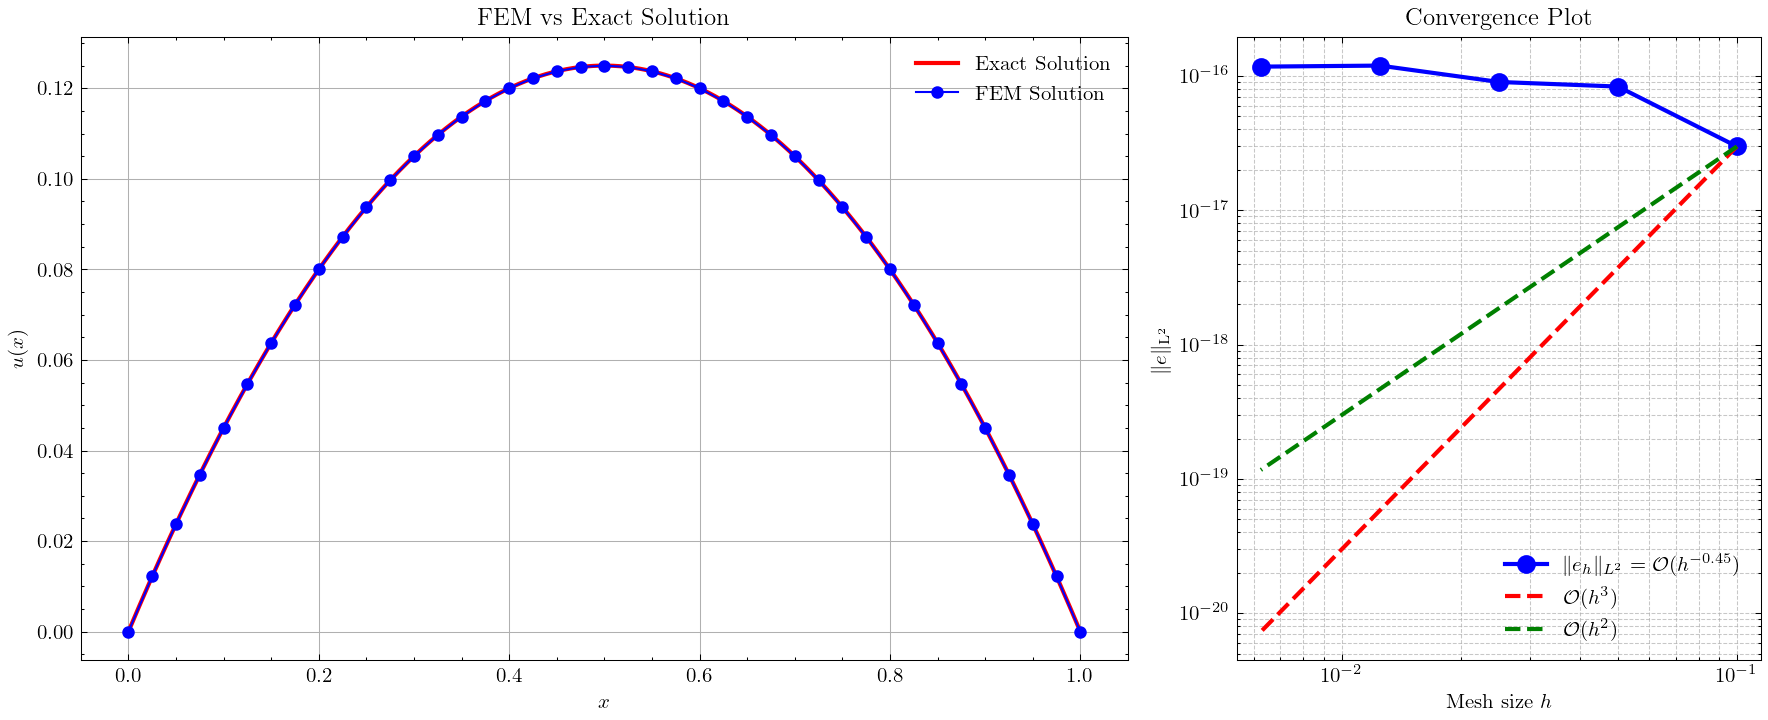

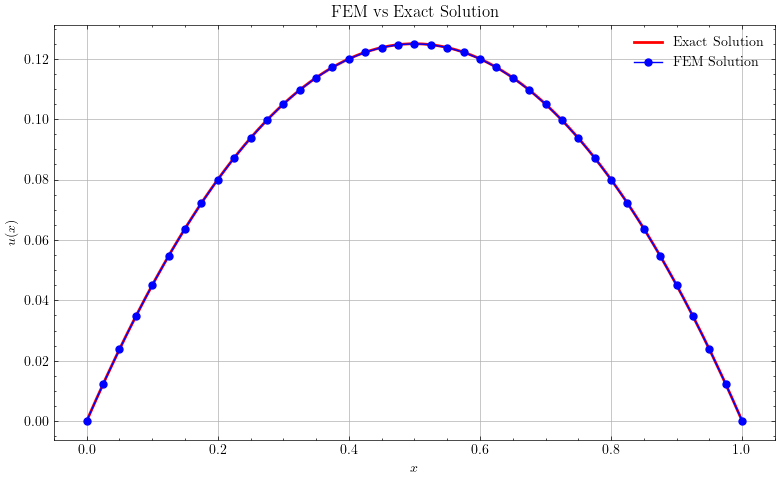

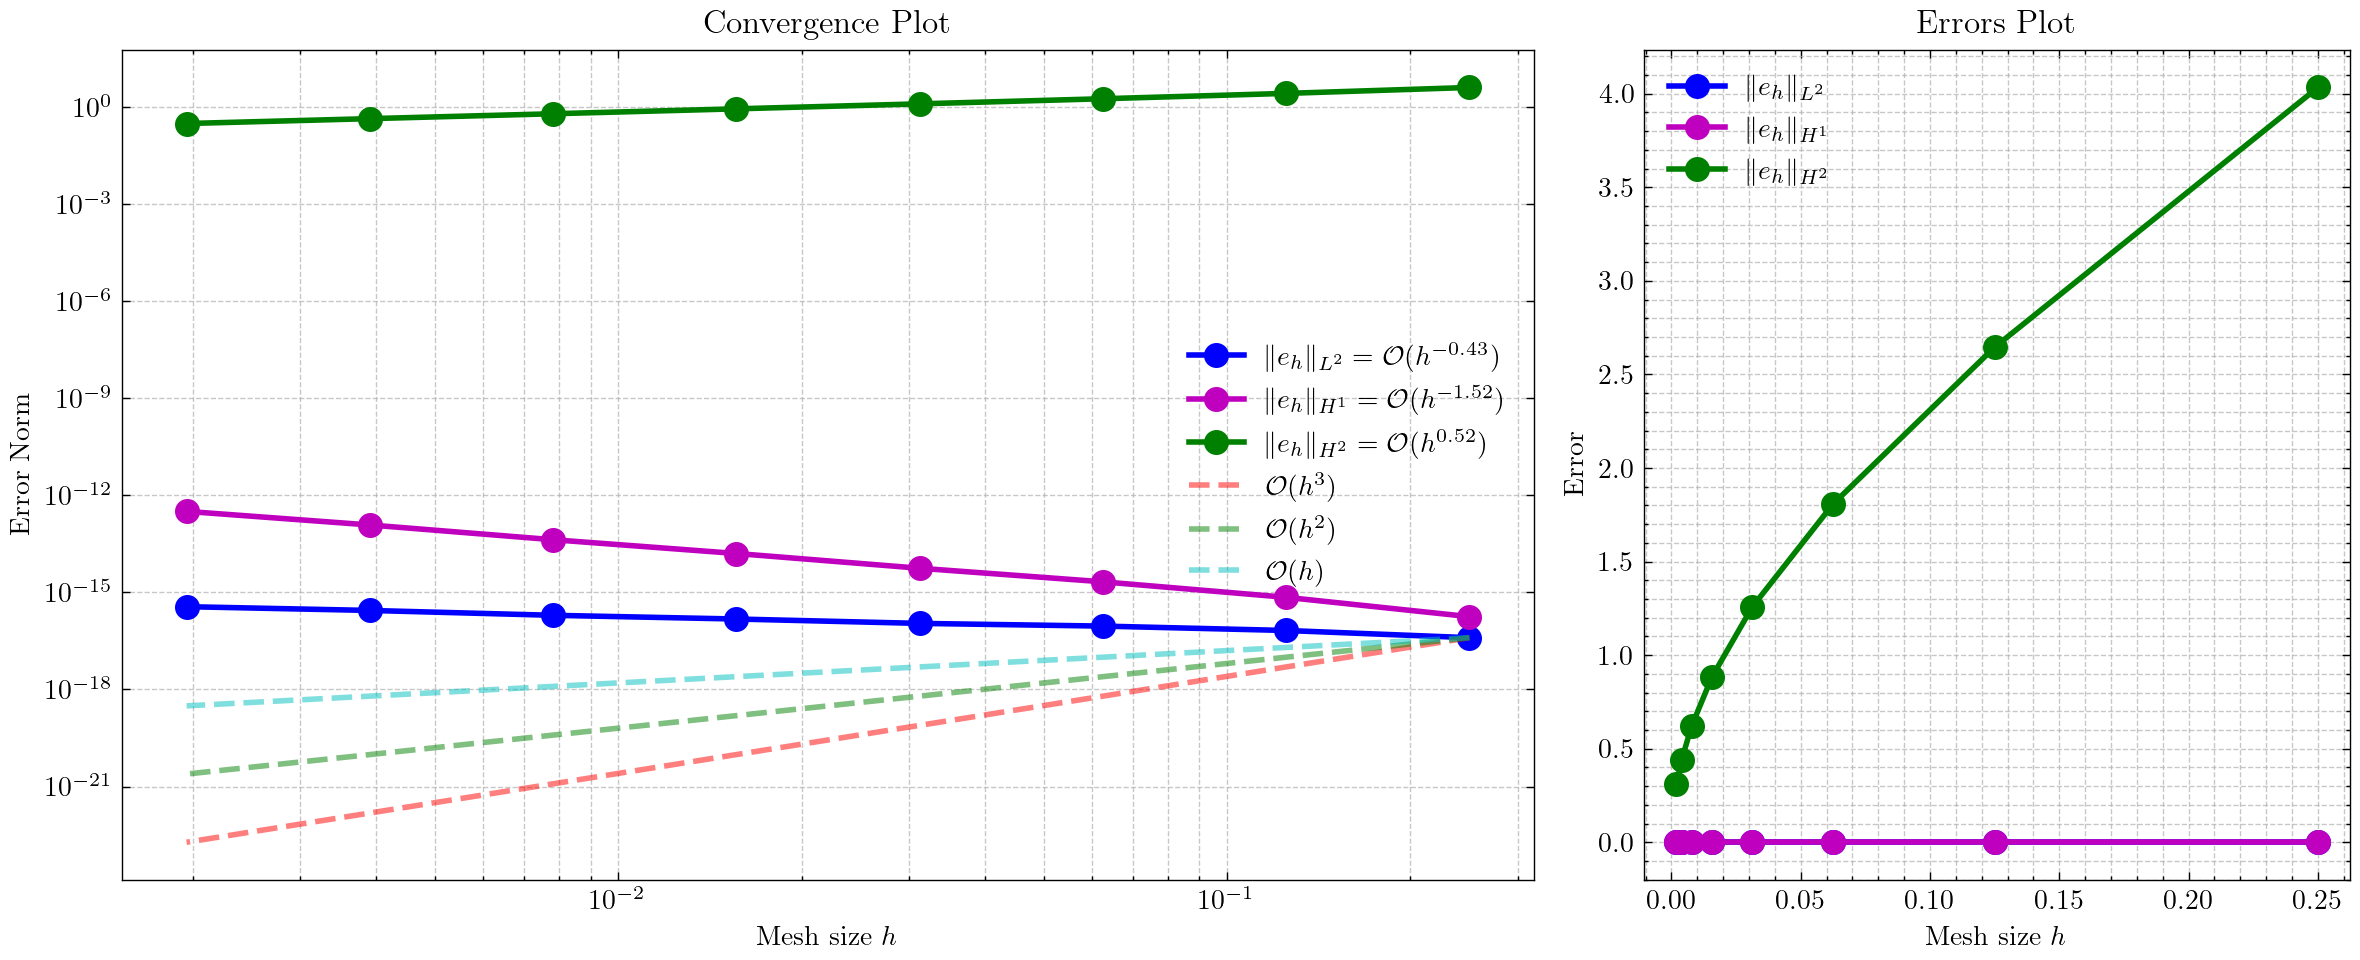

In [2]:
f1 = lambda x: 1.0
exact1 = lambda x: x*(1-x)/2
du_exact1 = lambda x: 0.5 - x
ddu_exact1 = lambda x: -1.0

savefig = False
solver1 = FEMPoissonSolver(M=20, f=f1, exact=exact1, du_exact=du_exact1, ddu_exact=ddu_exact1)
solver1.assemble()
solver1.solve()
solver1.print_convergence_table()
solver1.plot(fine_mesh=10_000, name='simple', savefig=savefig)
solver1.plot_solution(name='simple', savefig=savefig)
solver1.plot_convergence(name='simple', savefig=savefig)

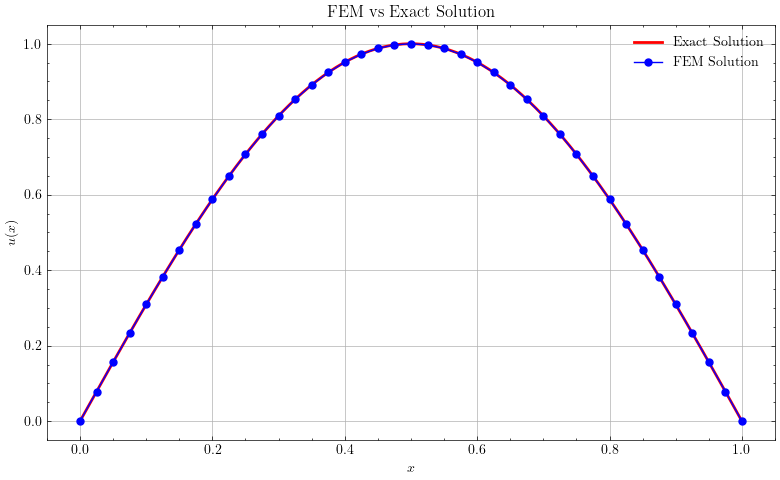

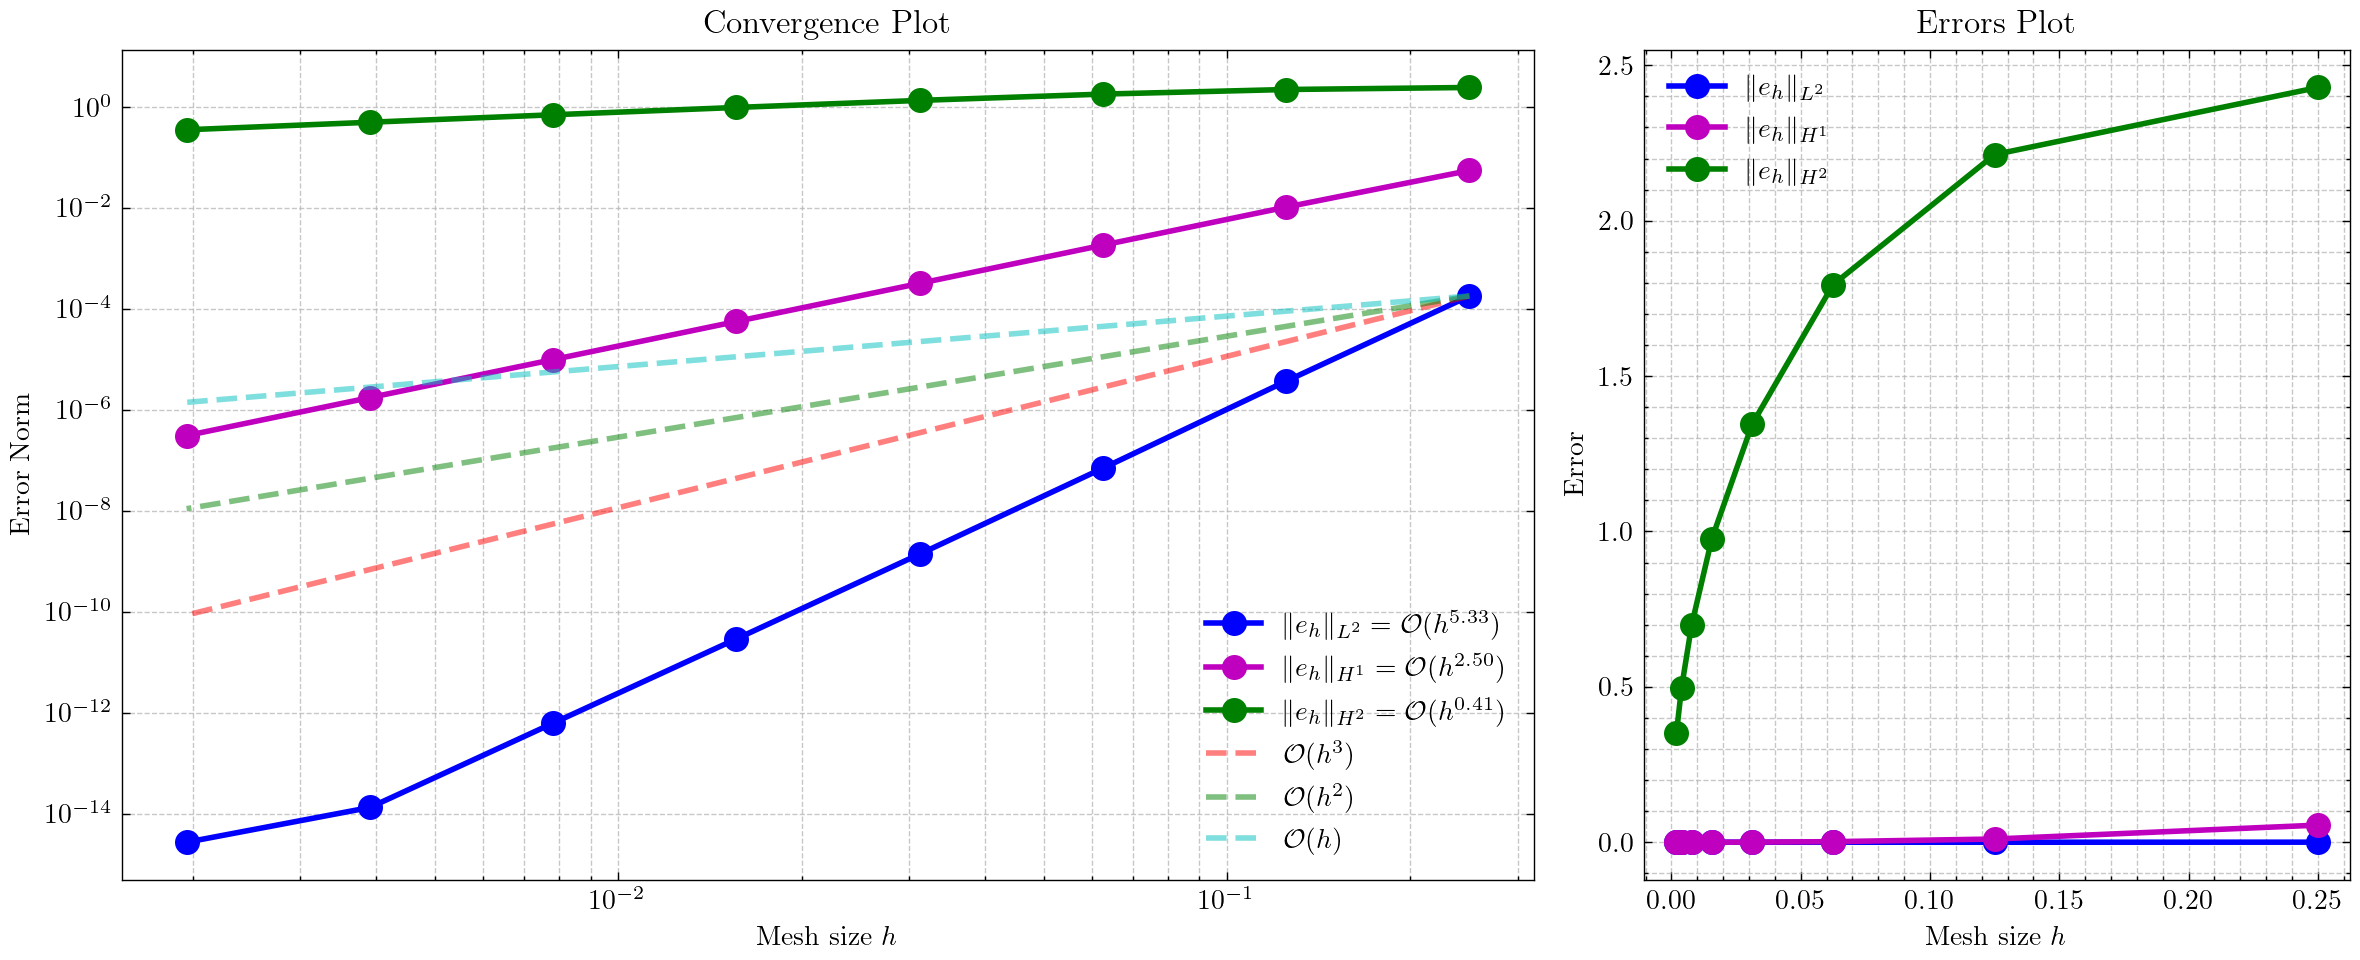


                                                  Convergence Analysis                                                  
     M           h        L2 Error    Rate L2     Ratio L2    H1 Error    Rate H1     Ratio H1    H2 Error    Rate H2     Ratio H2  
------------------------------------------------------------------------------------------------------------------------
     4        2.50e-01    1.80e-04       -           -        5.51e-02       -           -        2.43e+00       -           -      
     8        1.25e-01    3.70e-06      5.60       48.63      1.04e-02      2.41        5.31      2.21e+00      0.13        1.10    
     16       6.25e-02    6.98e-08      5.73       53.07      1.83e-03      2.50        5.67      1.79e+00      0.30        1.23    
     32       3.12e-02    1.39e-09      5.65       50.23      3.20e-04      2.51        5.71      1.35e+00      0.42        1.33    
     64       1.56e-02    2.90e-11      5.58       47.90      5.62e-05      2.51        5.69

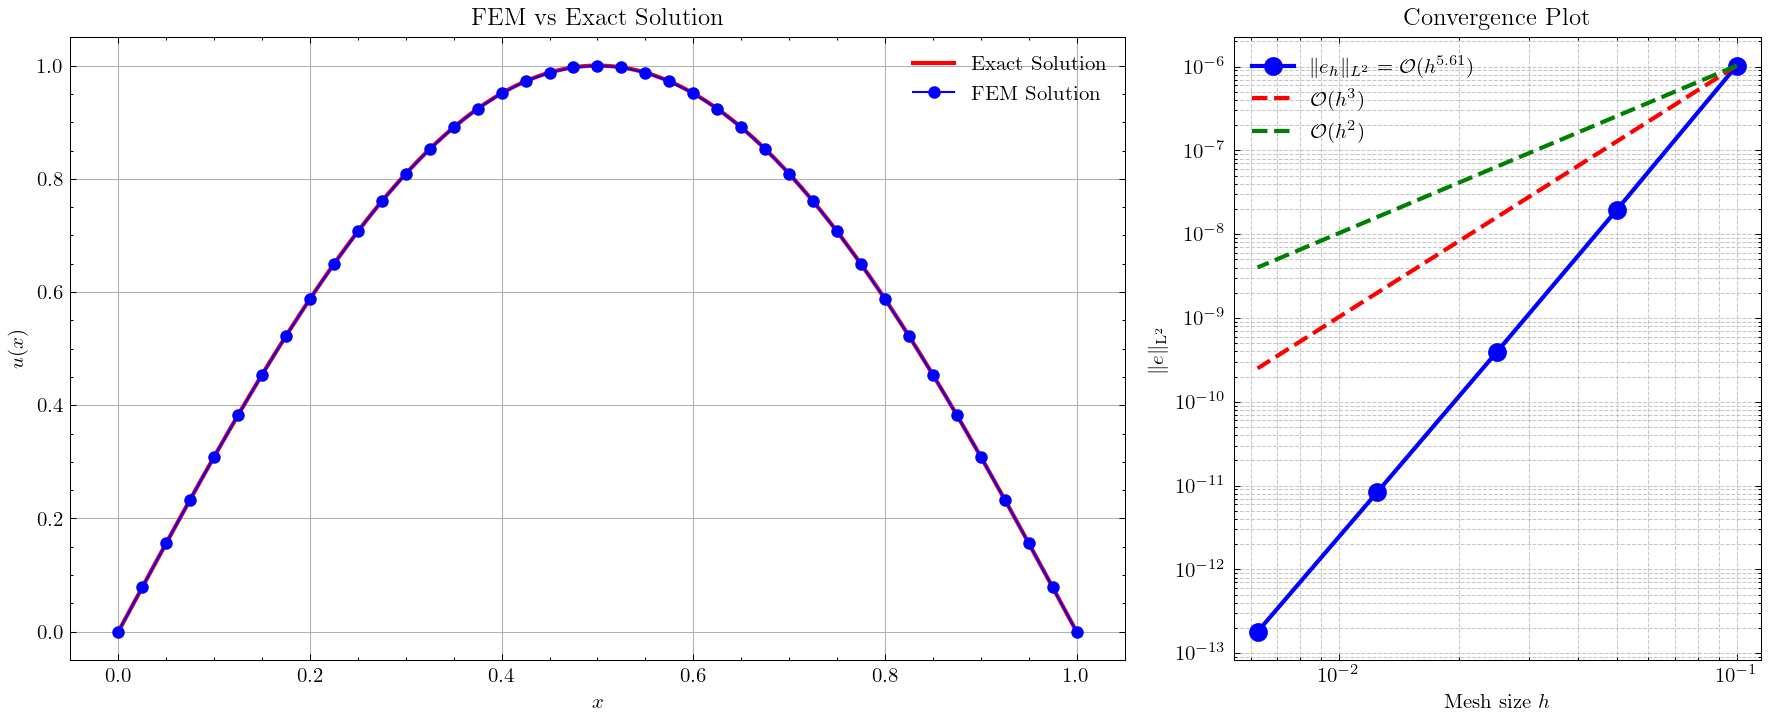

In [3]:

f2 = lambda x: np.pi**2 * np.sin(np.pi*x)
exact2 = lambda x: np.sin(np.pi*x)
du_exact2 = lambda x: np.pi * np.cos(np.pi*x)
ddu_exact2 = lambda x: -np.pi**2 * np.sin(np.pi*x)

savefig2= False
solver2 = FEMPoissonSolver(M=20, f=f2, exact=exact2, du_exact=du_exact2, ddu_exact=ddu_exact2)
solver2.assemble()
solver2.solve()
solver2.plot_solution(name='sine', savefig=savefig2)
solver2.plot_convergence(name='sine', savefig=savefig2)
solver2.print_convergence_table()
solver2.plot(fine_mesh=200, name='sine', savefig=savefig2)


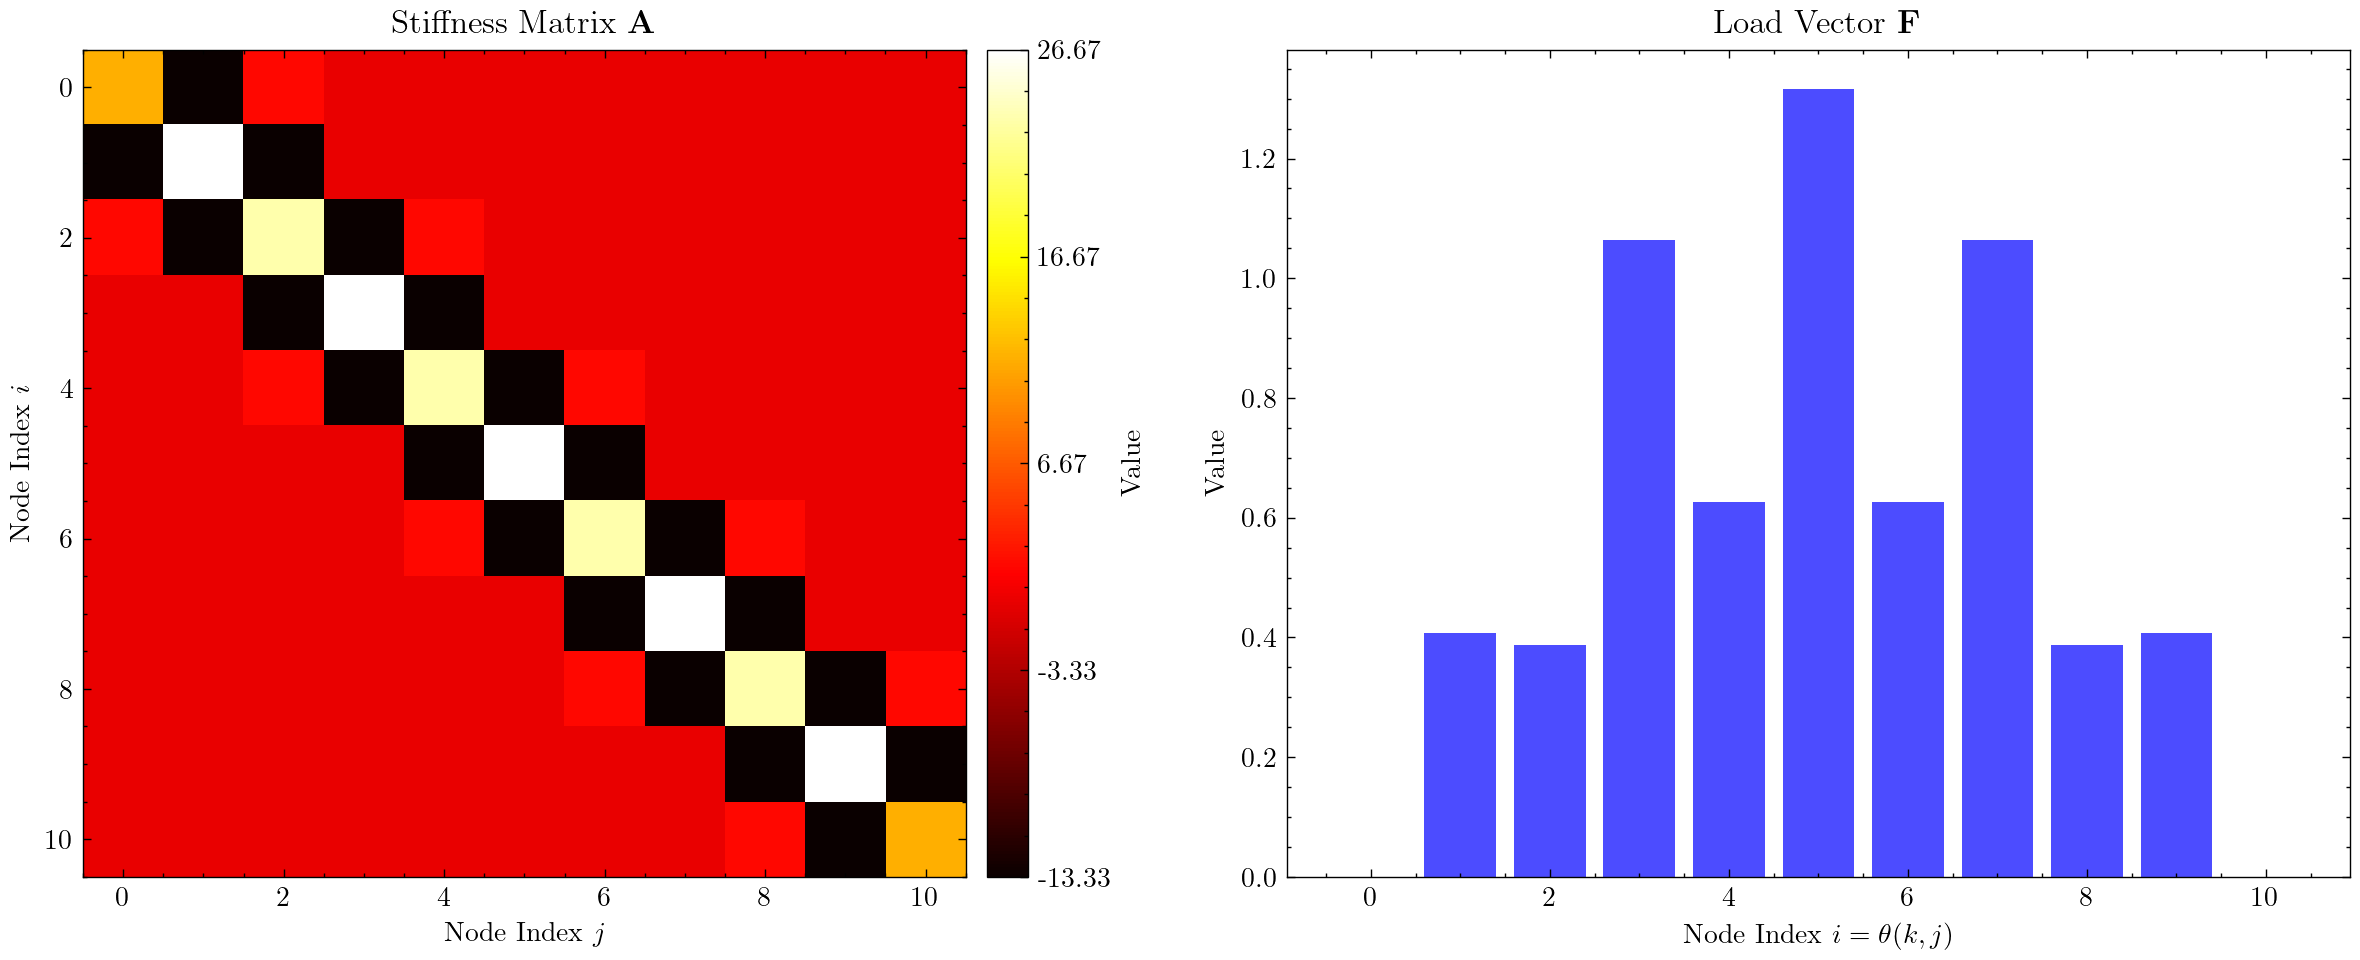

In [4]:
solver2 = FEMPoissonSolver(M=5, f=f2, exact=exact2, du_exact=du_exact2, ddu_exact=ddu_exact2)
solver2.assemble()
solver2.solve()
solver2.plot_stiffness_matrix_and_load_vector(name='sine', savefig= not savefig2)

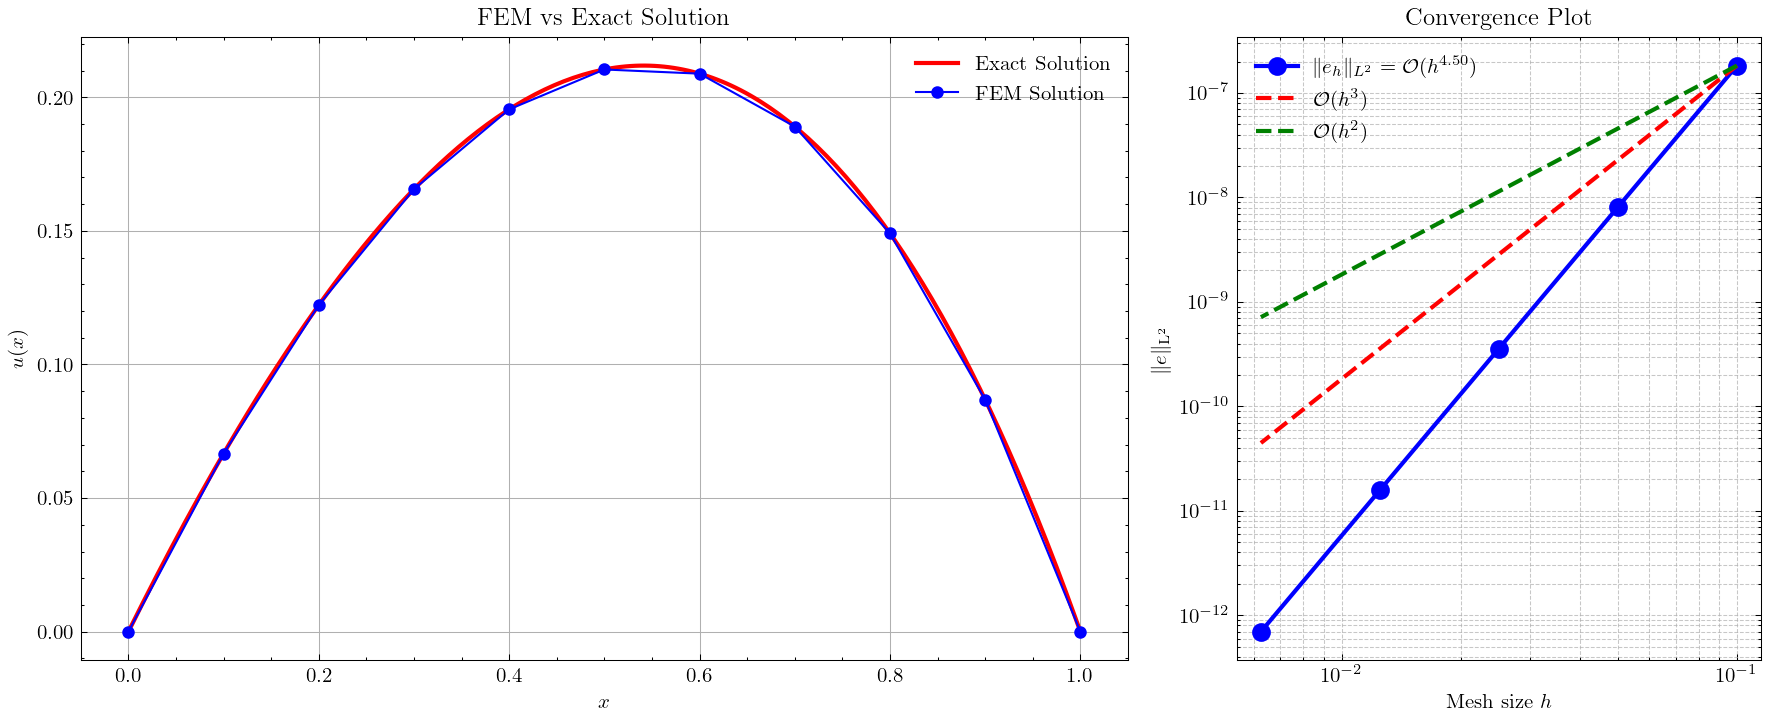

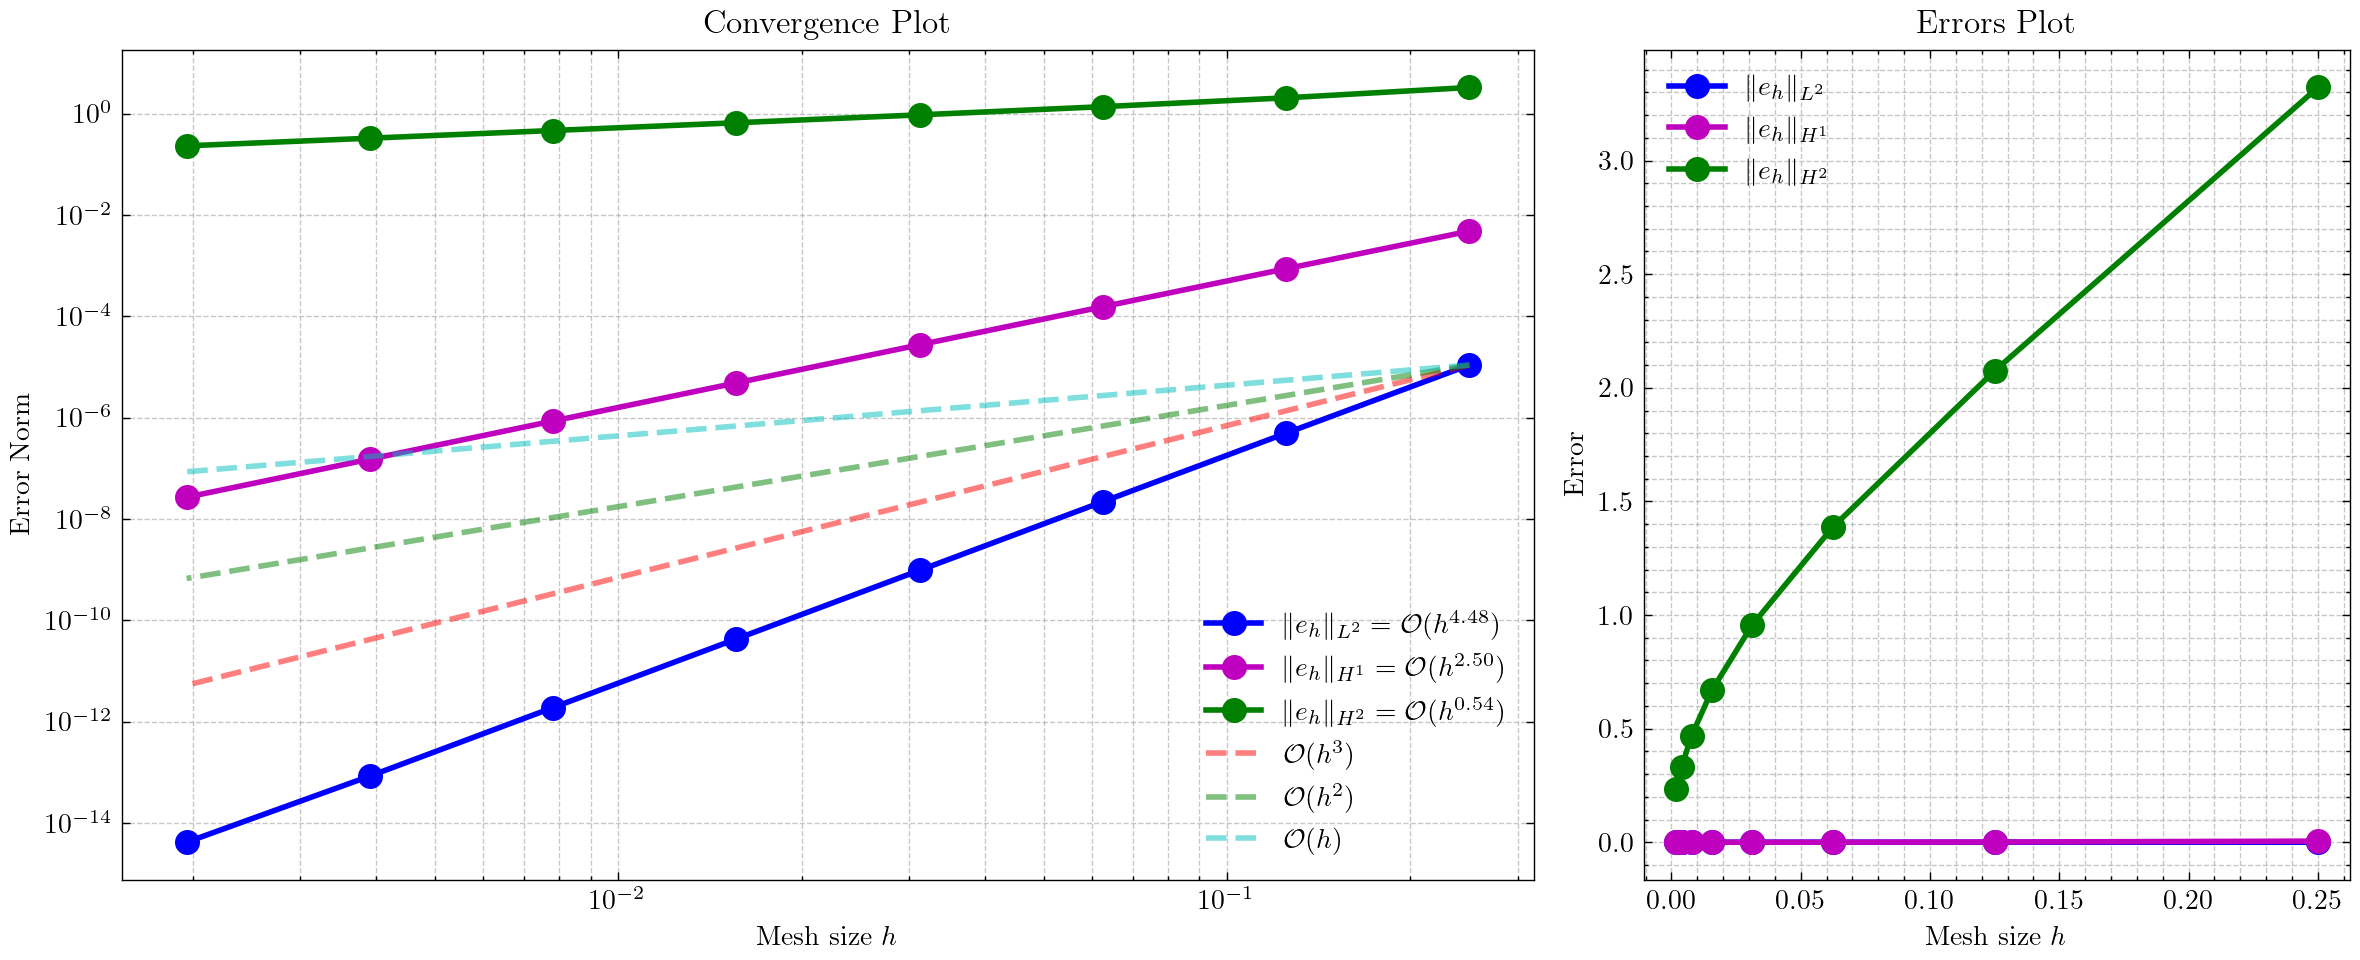


                                                  Convergence Analysis                                                  
     M           h        L2 Error    Rate L2     Ratio L2    H1 Error    Rate H1     Ratio H1    H2 Error    Rate H2     Ratio H2  
------------------------------------------------------------------------------------------------------------------------
     4        2.50e-01    1.10e-05       -           -        4.85e-03       -           -        3.32e+00       -           -      
     8        1.25e-01    4.98e-07      4.47       22.12      8.78e-04      2.47        5.52      2.07e+00      0.68        1.60    
     16       6.25e-02    2.21e-08      4.50       22.55      1.56e-04      2.49        5.62      1.39e+00      0.58        1.49    
     32       3.12e-02    9.76e-10      4.50       22.64      2.76e-05      2.50        5.65      9.57e-01      0.54        1.45    
     64       1.56e-02    4.31e-11      4.50       22.64      4.89e-06      2.50        5.65

In [5]:
def f_test3(x): return np.exp(x)
def u_exact_test3(x): return -np.exp(x) + (np.e - 1)*x + 1
def du_exact_test3(x): return -np.exp(x) + (np.e - 1)
def ddu_exact_test3(x): return -np.exp(x)
savefig3 = False
solver3 = FEMPoissonSolver(M=5, f=f_test3, exact=u_exact_test3, du_exact=du_exact_test3, ddu_exact=ddu_exact_test3)
solver3.assemble()
solver3.solve()
solver3.plot(fine_mesh=200, name='exp', savefig=savefig3)
solver3.plot_convergence(name='exp', savefig=savefig3)
solver3.print_convergence_table()

In [6]:

def u_exact_test4(x):
    return (1.0 / (np.pi**2)) * np.sin(np.pi * x) + (1.0 / (4 * np.pi**2)) * np.sin(2 * np.pi * x)
def f_test4(x):
    return np.sin(np.pi * x) + np.sin(2 * np.pi * x)

savefig4 = False
solver4 = FEMPoissonSolver(M=20, f=f_test4, exact=u_exact_test4)
solver4.assemble()
solver4.solve()
solver4.print_convergence_table()
solver4.plot(fine_mesh=200, name='complex', savefig=savefig4)
solver4.plot_convergence(name='complex', savefig=savefig4)
solver4.plot_solution(name='complex', savefig=savefig4)

TypeError: FEMPoissonSolver.__init__() missing 2 required positional arguments: 'du_exact' and 'ddu_exact'

Convergence Table for yd_case1:
alpha      n          L2 Error        L2 Rate         L2 Order        H1 Error        H1 Rate         H1 Order       
0.01       4          0.006345        nan             nan             0.010392        nan             nan            
0.01       8          0.002499        1.344161        -2.881409       0.011326        -0.124173       -2.154724      
0.01       16         0.001064        1.232689        -2.469229       0.008266        0.454465        -1.729659      
0.01       32         0.000443        1.264415        -2.228266       0.005774        0.517517        -1.487231      
0.01       64         0.000185        1.255462        -2.066132       0.003827        0.593555        -1.338285      
0.01       128        0.000078        1.252804        -1.949942       0.002438        0.650127        -1.239976      
0.0001     4          0.000309        nan             nan             0.003475        nan             nan            
0.0001     8          0.

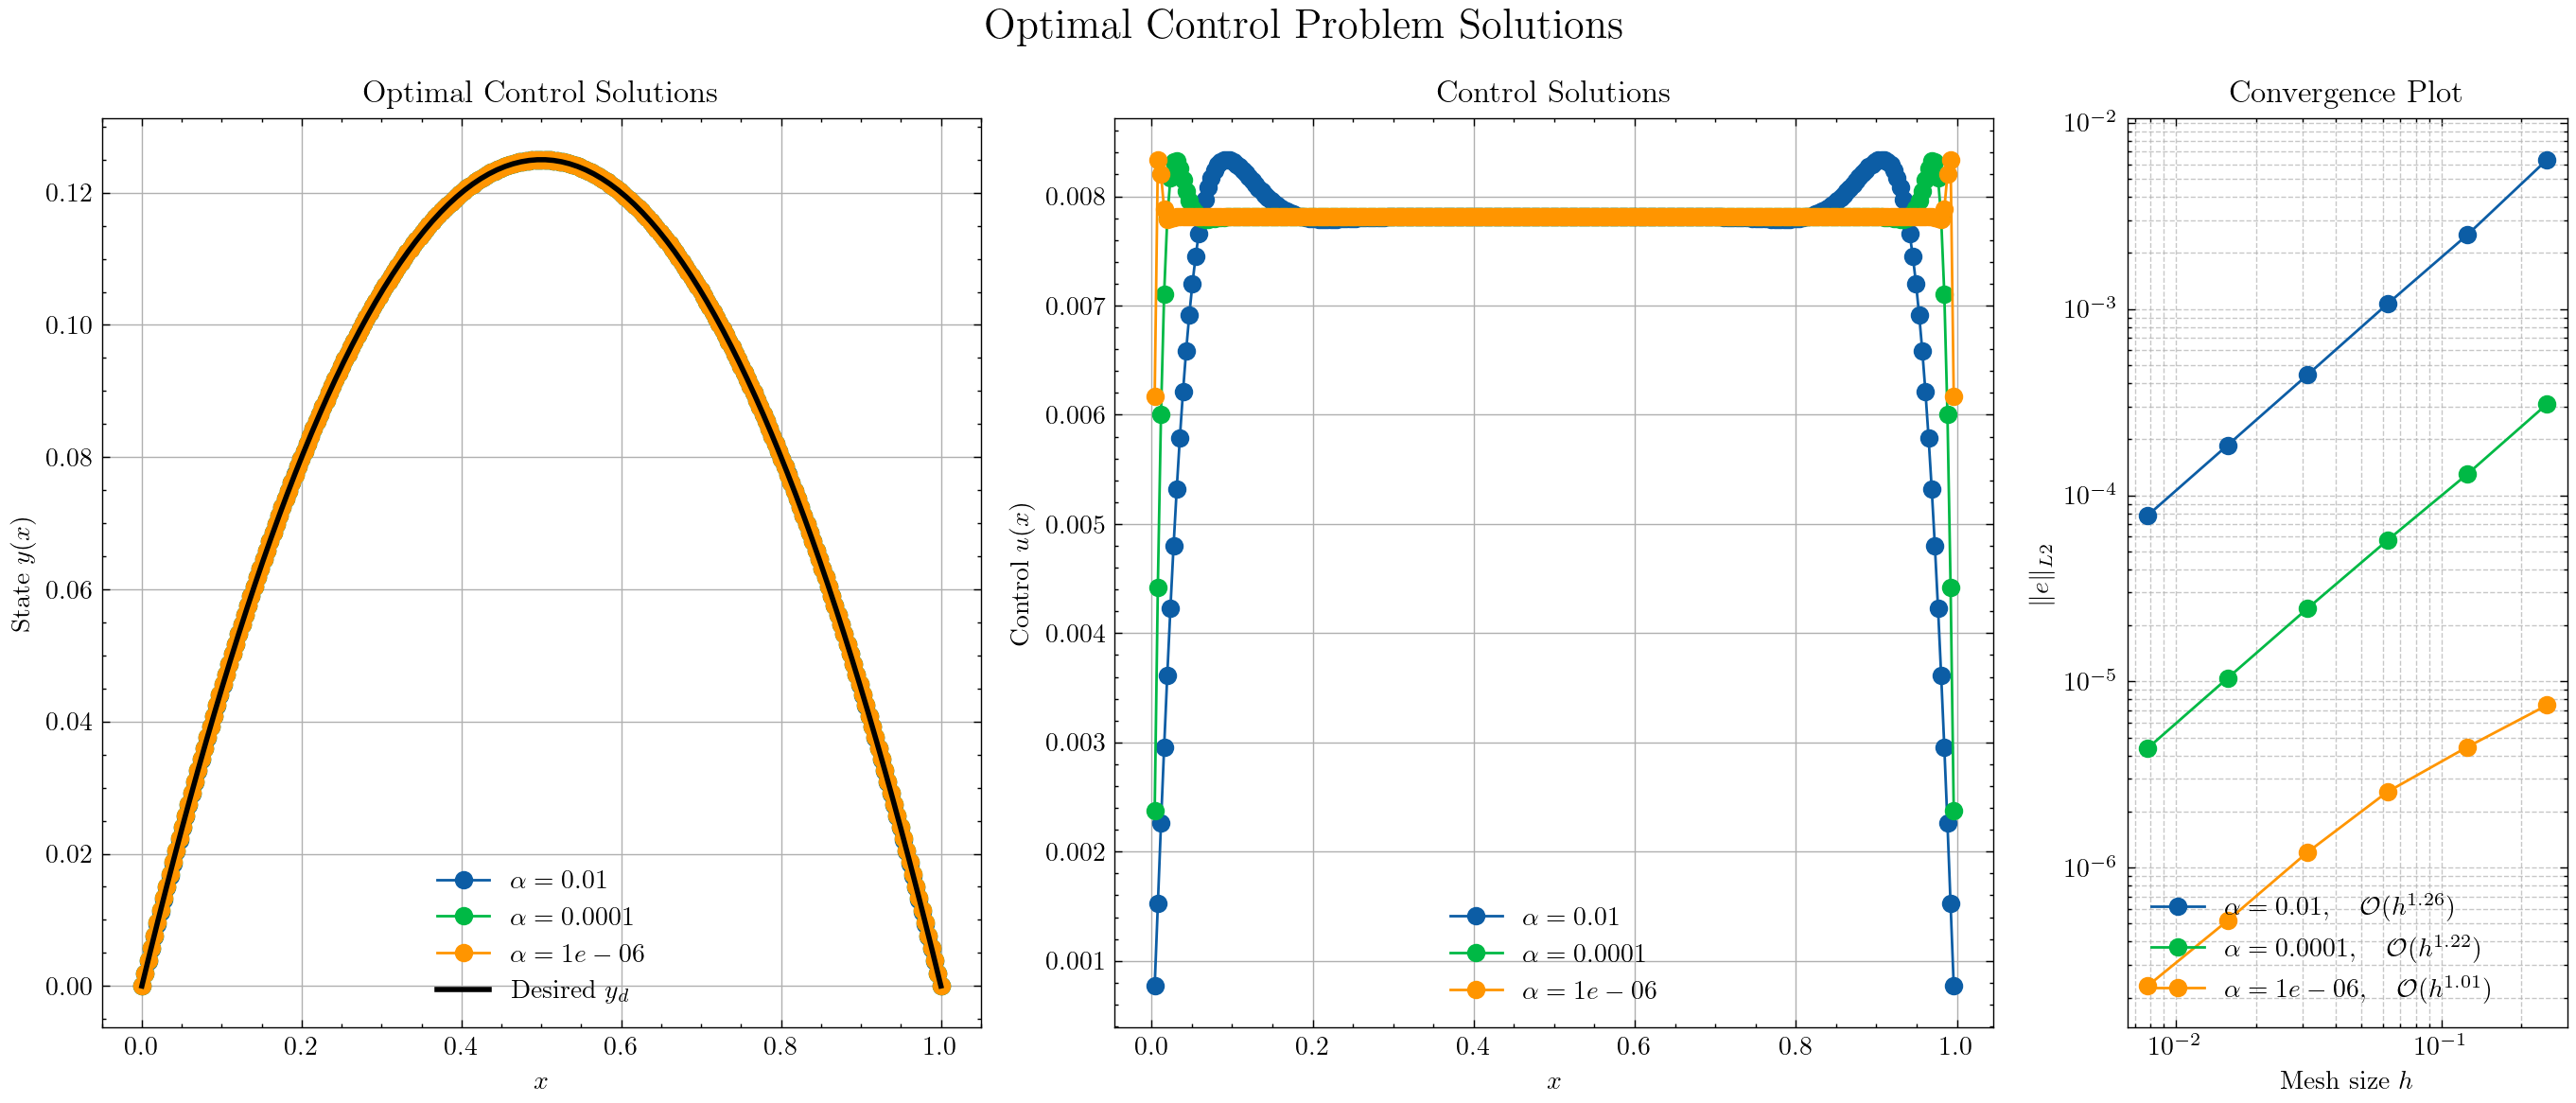



Convergence Table for yd_case2:
alpha      n          L2 Error        L2 Rate         L2 Order        H1 Error        H1 Rate         H1 Order       
0.01       4          0.270352        nan             nan             2.066545        nan             nan            
0.01       8          0.266085        0.022952        -0.636680       2.576473        -0.318176       0.455133       
0.01       16         0.239538        0.151631        -0.515418       3.272583        -0.345032       0.427607       
0.01       32         0.213174        0.168228        -0.445980       4.048530        -0.306968       0.403480       
0.01       64         0.186429        0.193402        -0.403883       4.931085        -0.284507       0.383651       
0.01       128        0.161157        0.210163        -0.376209       5.954926        -0.272178       0.367726       
0.0001     4          0.055638        nan             nan             0.671054        nan             nan            
0.0001     8          

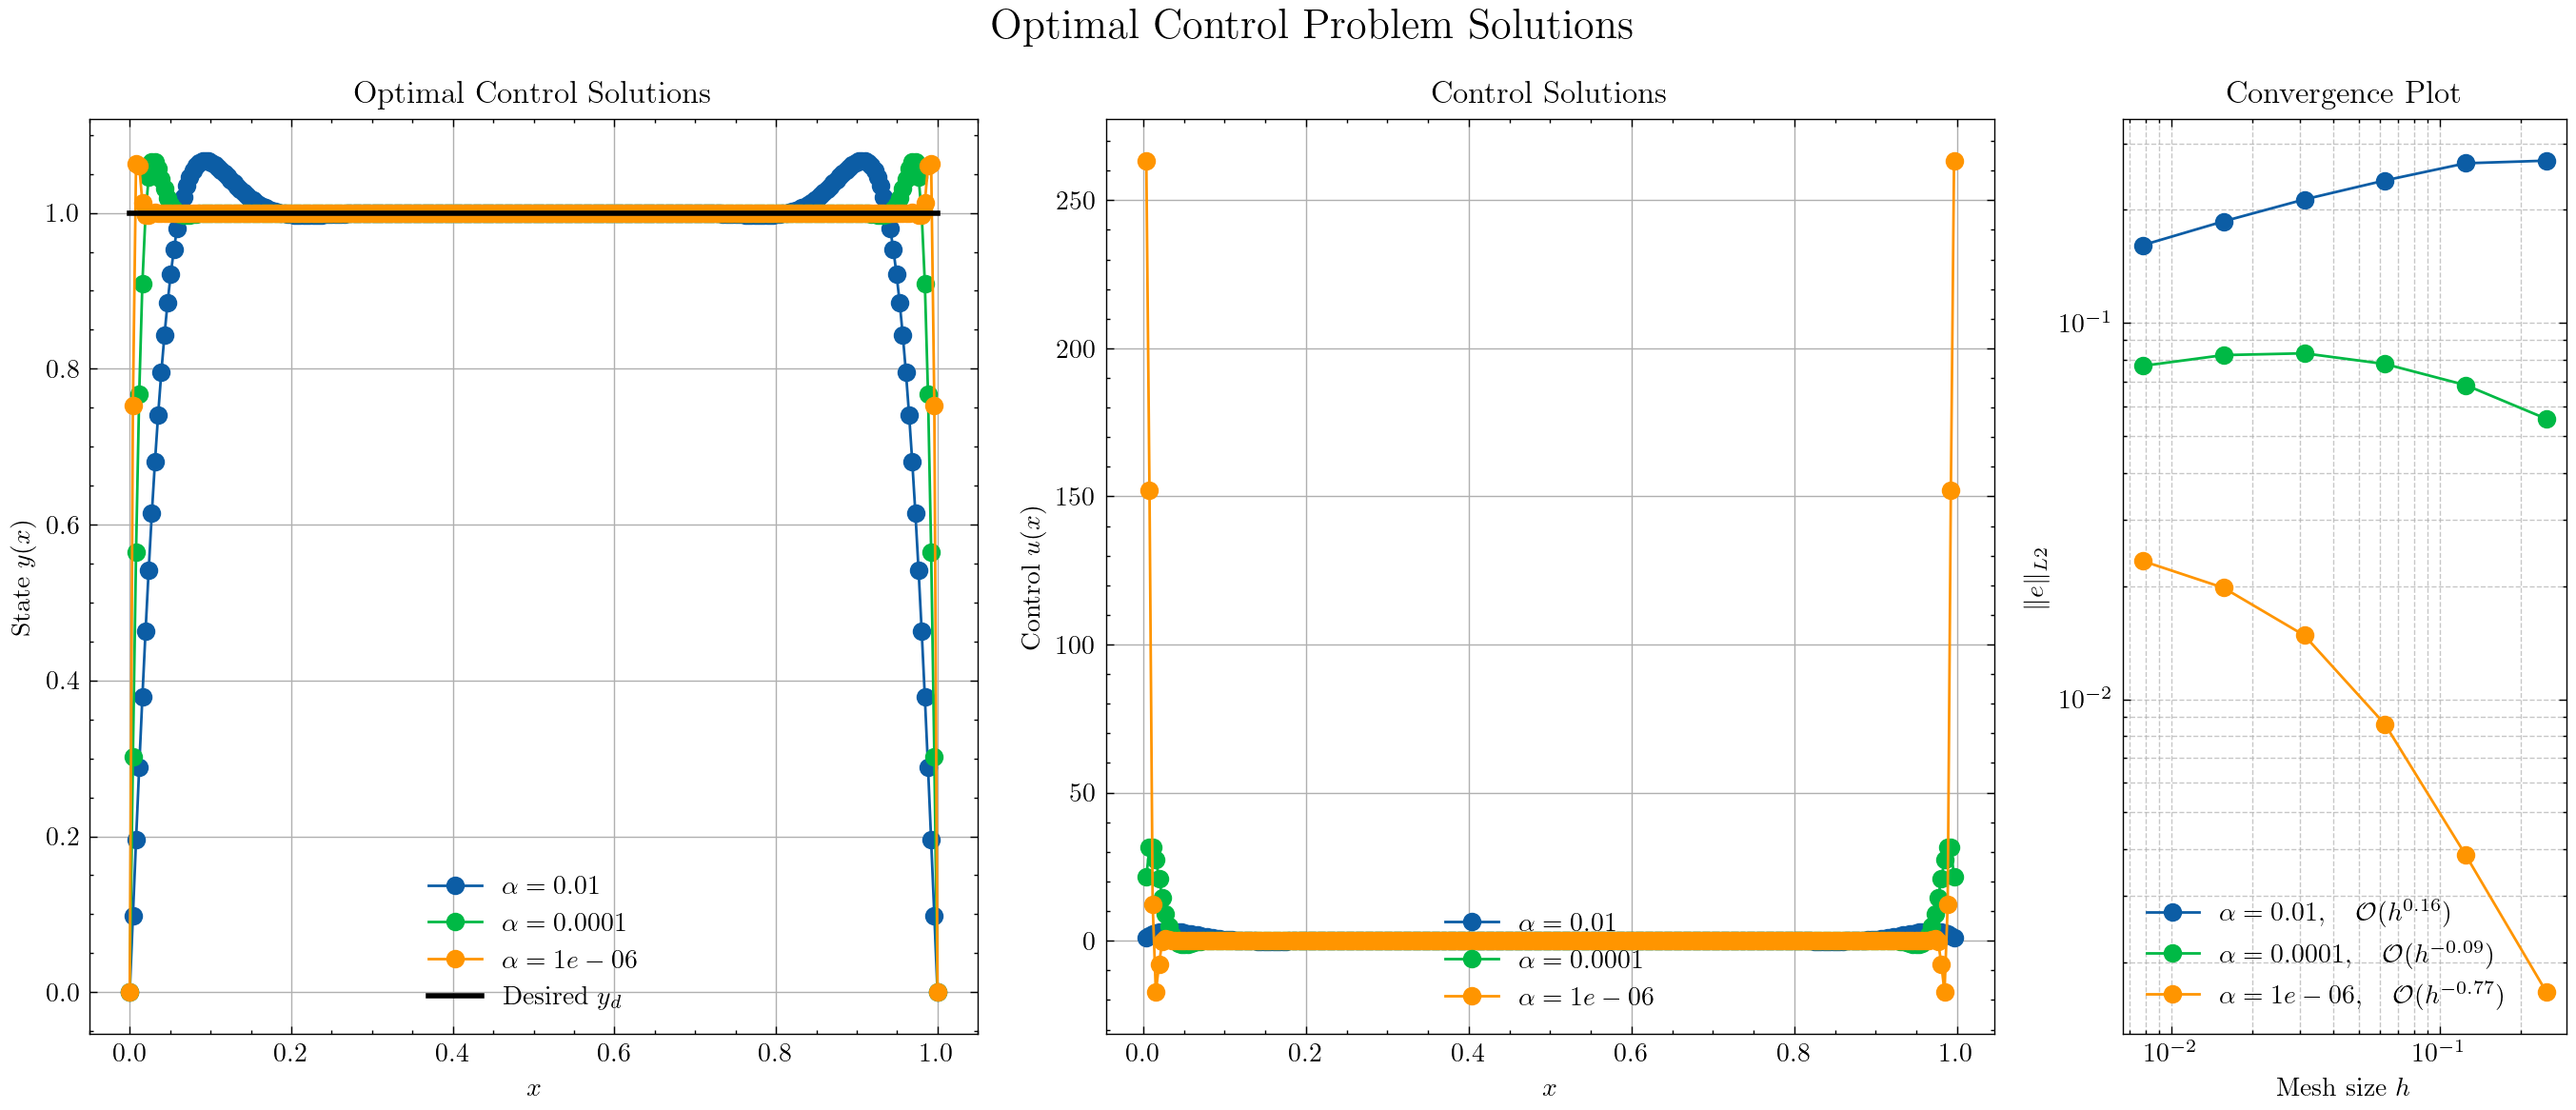



Convergence Table for yd_case3:
alpha      n          L2 Error        L2 Rate         L2 Order        H1 Error        H1 Rate         H1 Order       
0.01       4          0.260253        nan             nan             3.115391        nan             nan            
0.01       8          0.244090        0.092502        -0.678172       3.092364        0.010703        0.542903       
0.01       16         0.207382        0.235117        -0.567409       4.708724        -0.606626       0.558834       
0.01       32         0.172798        0.263207        -0.506568       7.025900        -0.577347       0.562537       
0.01       64         0.145044        0.252600        -0.464240       10.333750       -0.556609       0.561549       
0.01       128        0.121858        0.251290        -0.433819       15.016081       -0.539144       0.558348       
0.0001     4          0.122636        nan             nan             1.387773        nan             nan            
0.0001     8          

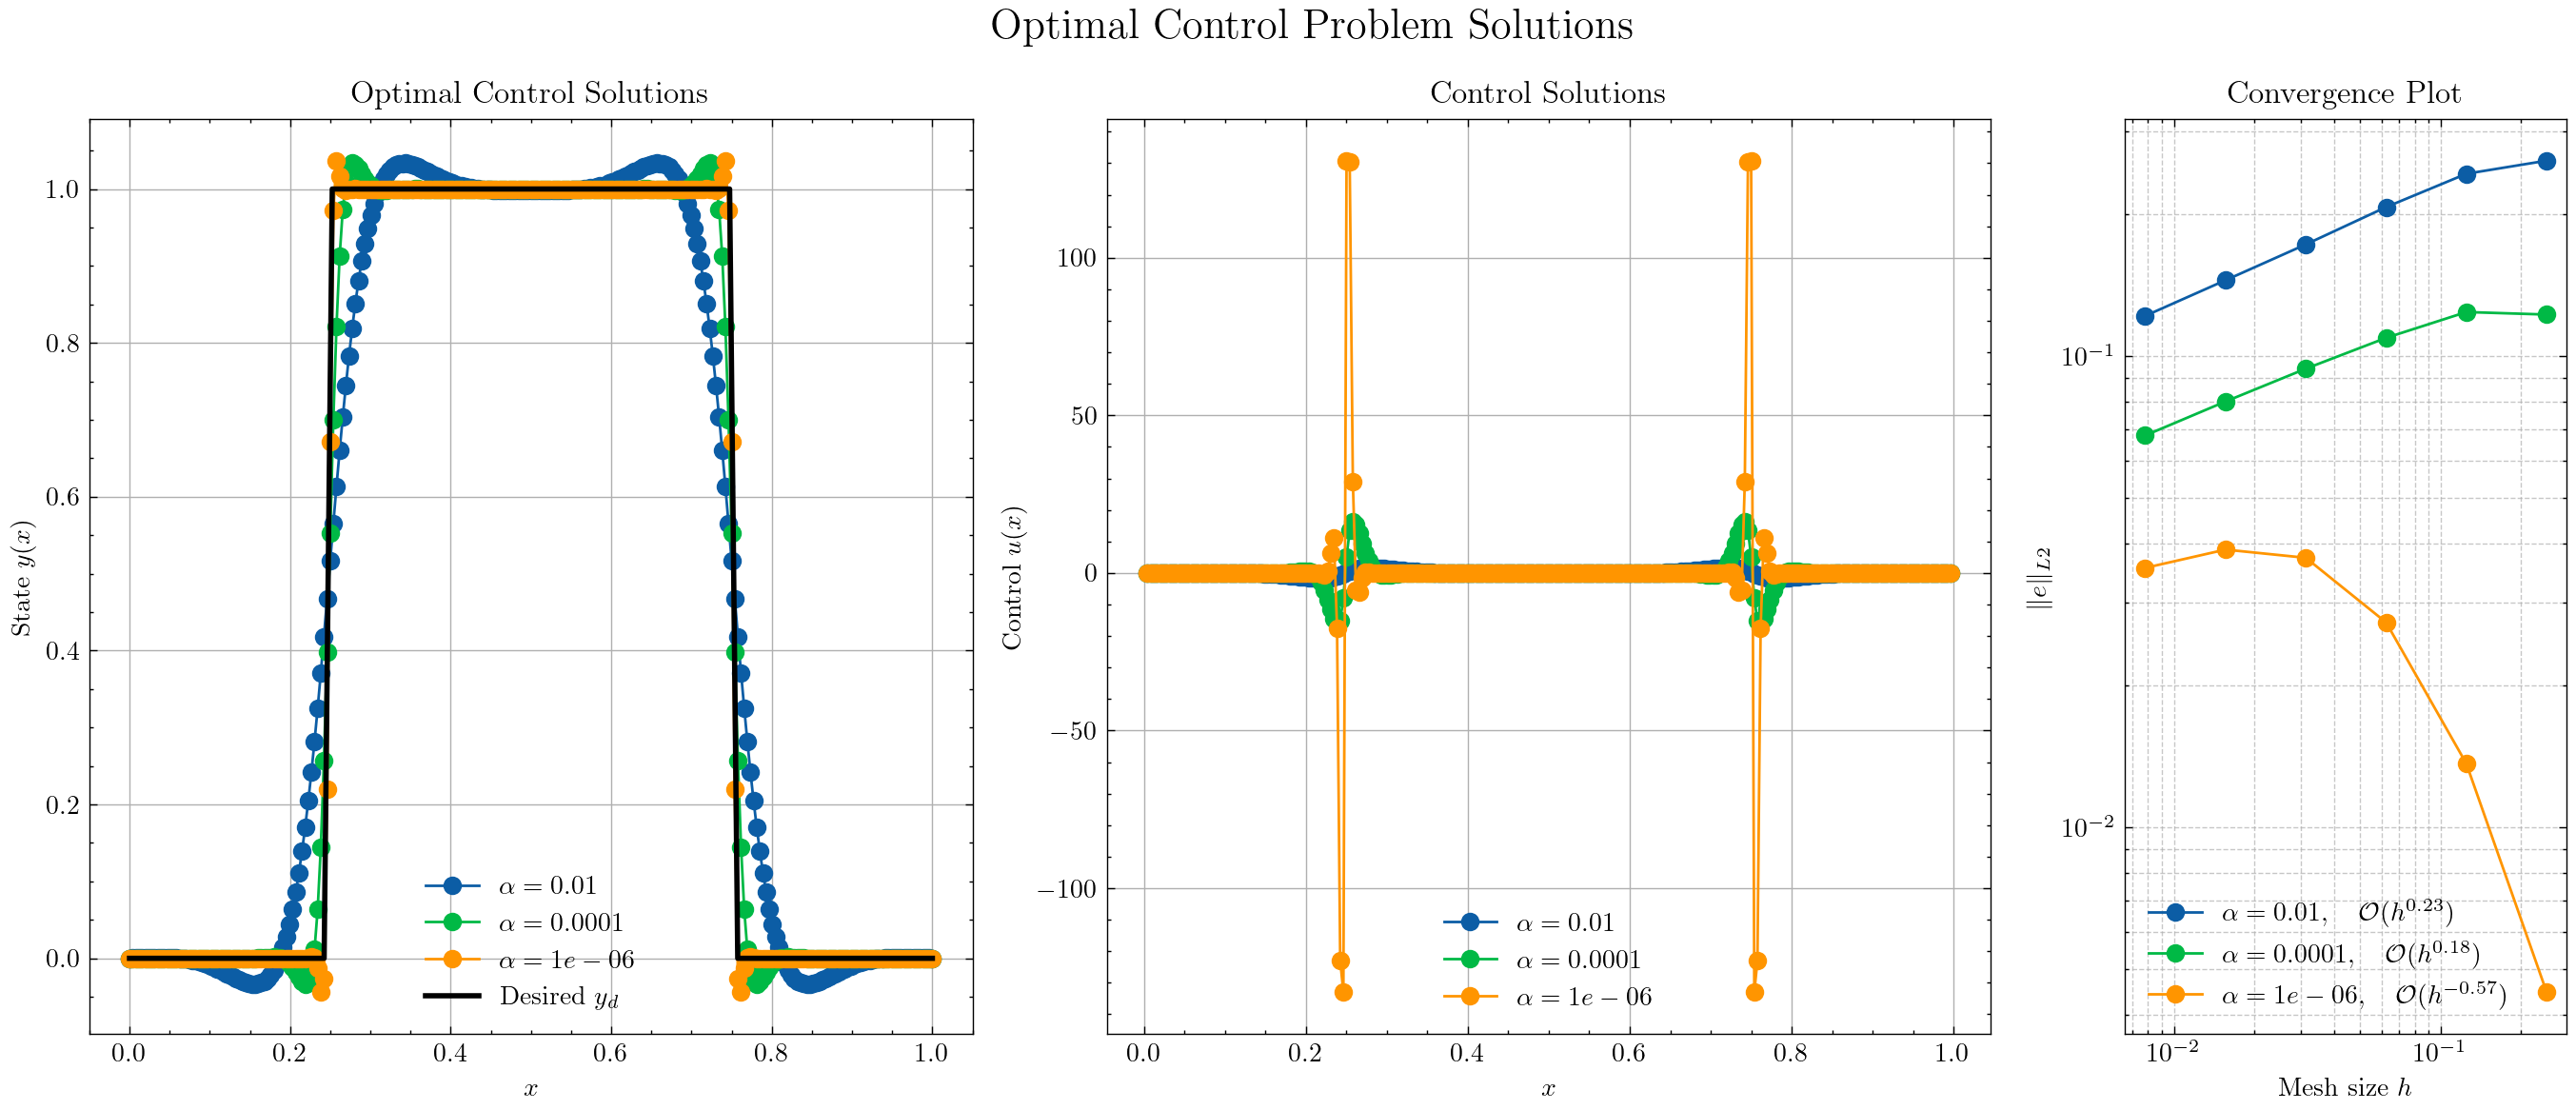

In [ ]:
from problem_2.OCP import print_convergence, plot_opt_control_multi

def yd_case1(x): 
    return 0.5 * x * (1 - x)

def yd_case2(x): 
    return np.ones_like(x)

def yd_case3(x): 
    return np.where((x >= 0.25) & (x <= 0.75), 1.0, 0.0)

cases = [(yd_case1, "Case 1"),
         (yd_case2, "Case 2"),
         (yd_case3, "Case 3")]


alphas = [1e-2, 1e-4, 1e-6]
n_elements = 50
solver = FEMSolver(n_elements)
n_vals = [4, 8, 16, 32, 64, 128]

for yd_case, title in cases:
    print_convergence(solver, yd_case, alphas, n_vals)
    plot_opt_control_multi(alphas, n_vals, yd_case, fine_mesh=100, savefig=False, name=title)
    print("\n")

